In [1]:
#Sentiment analysis task
#Setup files for this task

import pandas as pd
from wordcloud import STOPWORDS,WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [2]:
#Loading the file path for the csv file to be analyzed
file = "./cleaned_tweet_data.csv"


In [3]:
def read_proccessed_data(csv_path):
    df = pd.read_csv(csv_path)
    return df

In [4]:
df = read_proccessed_data(file)
df.info()
#to inspect the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       6532 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  6532 non-null   float64
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               6532 non-null   object 
 15  clean_text          6530 non-null   object 
dtypes: flo

In [5]:
# identifying the third column which is polarity
df['polarity']
df['polarity'].value_counts()

 0.000000    1829
-0.750000     501
 0.500000     210
 0.133333     202
 0.337500     189
             ... 
 0.518182       1
-0.060000       1
 0.096591       1
 0.260000       1
-0.292857       1
Name: polarity, Length: 380, dtype: int64

In [6]:
# checking if there are null values
text_null_sum = df['clean_text'].isnull().sum()
polarity_null_sum = df['polarity'].isnull().sum()

print(f'the total null vaues in the column "clean_Text" is: {text_null_sum}')
print(f'the total null vaues in the column "polarity" is: {polarity_null_sum}')

the total null vaues in the column "clean_Text" is: 2
the total null vaues in the column "polarity" is: 0


In [7]:
# now creating a separate dataframe called "cleanedtweet" for 'polarity' and 'clean_text' columns 
cleanedTweet = pd.DataFrame(columns=['clean_text','polarity'])

cleanedTweet['clean_text'] = df['clean_text']
cleanedTweet['polarity'] = df['polarity']
cleanedTweet.dropna(inplace=True)

In [8]:
cleanedTweet

,clean_text,polarity
0,"africa is ""in the midst of a full-blown third ...",0.166667
1,dr moeti is head of who in africa and one of t...,0.133333
2,thank you for creating this amazing campaign ...,0.316667
3,former pfizer vp and virologist dr michael yea...,0.086111
4,i think it s important that we don t sell cova...,0.280000
...,...,...
6527,rt : zweli please just release the graphic des...,0.000000
6528,former pfizer vp and virologist dr michael yea...,0.086111
6529,respectfully veterinarians have to have a broa...,0.281250
6530,"""africa needs millions more doses here &amp; n...",0.125000


In [9]:
def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "neutral"
    else:
        return "negative"
    # this function  will taka a float variable 'p' to evaluate it in the "if" function and return it as a string

In [10]:
# creating score column by applying text_category
cleanedTweet['score'] = cleanedTweet['polarity'].apply(text_category)
cleanedTweet['score'].value_counts()
#data is ready to be plotted and analyzed

positive    3426
neutral     1827
negative    1277
Name: score, dtype: int64

<AxesSubplot:title={'center':'score'}>

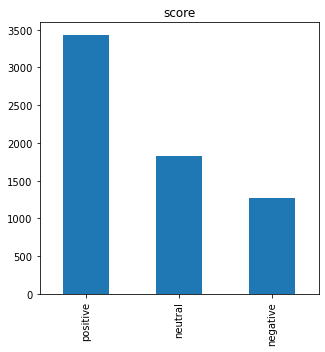

In [11]:
# Grouping the scores and plotting bar graph
score_count =  cleanedTweet['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[5, 5])


<AxesSubplot:title={'center':'score'}, ylabel='score'>

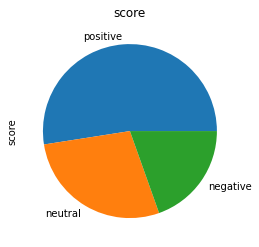

In [12]:
score_count.plot(kind="pie", y="score", title="score", x="", figsize=[4, 4])
